# Task 1: Understanding the problem



# Task 2: Import libraries and Datasets





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder # To encoding categorical data
from sklearn.preprocessing import MinMaxScaler # To scale input data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

Configure options of the libraries

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ingcastaleo/Business-Data-Science/main/Human_Resources.csv') # Importing dataset
df.describe() # Gain insigts on the dataset

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info() # Gain insigts on the dataset datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
mean_age = df.describe()['Age'][1]
print(f'The mean age is { mean_age } years')

The mean age is 36.923809523809524 years


In [ ]:
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x:1 if x == 'Y' else 0)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


#Task 3: Visualize the data

Following the data will be visualized to gain insigths on what variables can be related.

Initially we are looking for missing data and correlations in the data.

Check out for missing data

There is no missing data


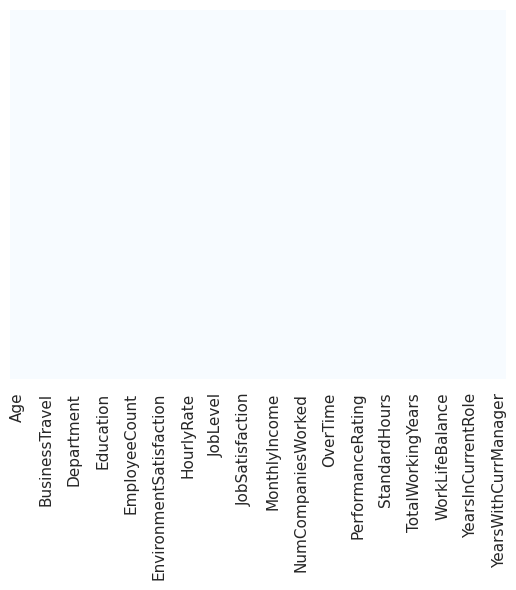

In [ ]:
_ = sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'Blues')
print('There is no missing data')

Study the data statistics

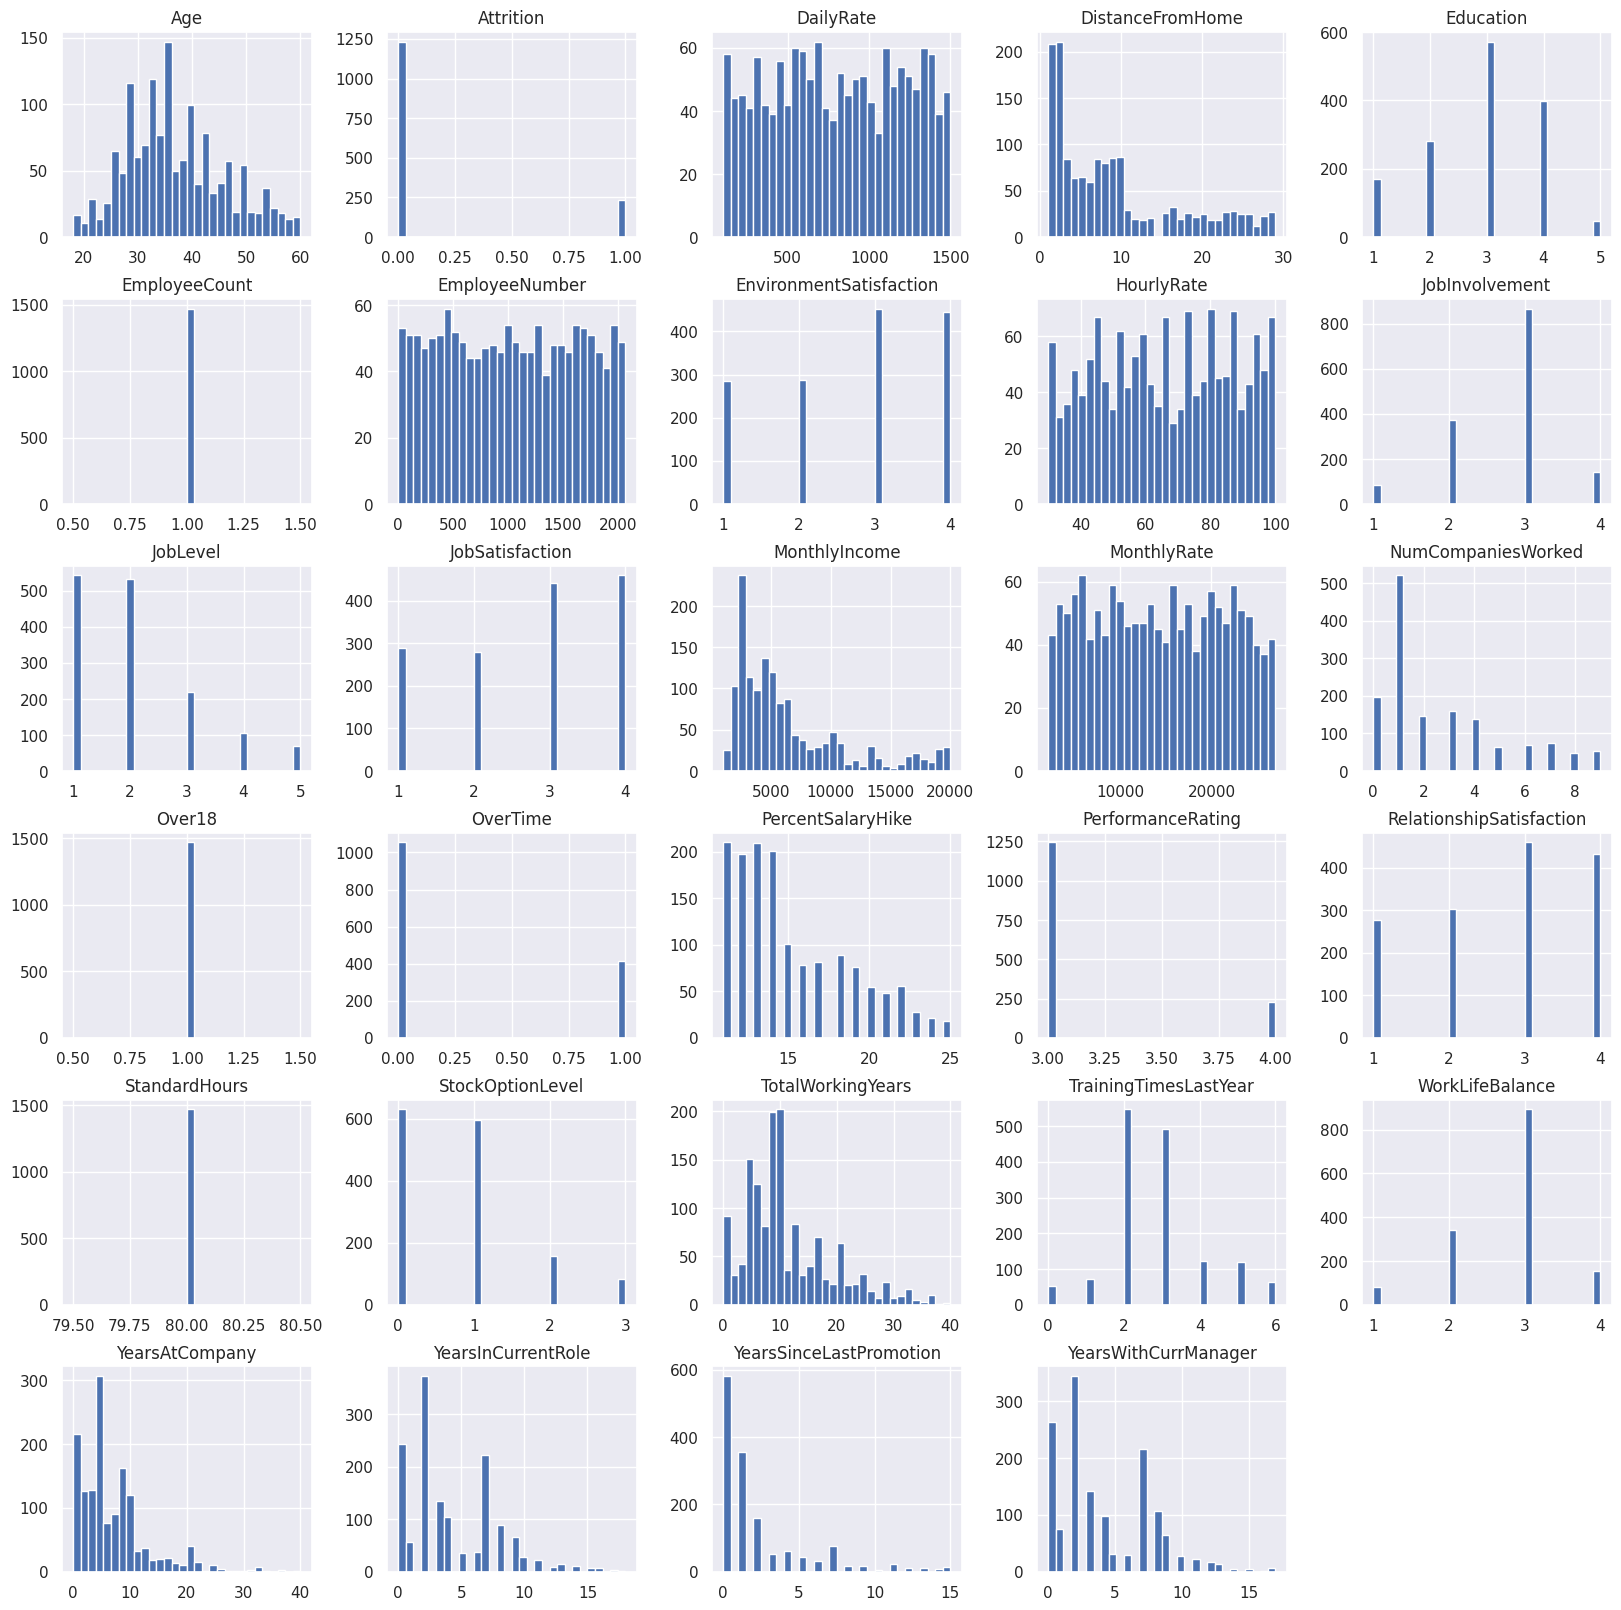

In [ ]:
_ = df.hist(bins=30, figsize=(20,20),color='b')


*   There is a note-worthy approx 250 employees that have resigned. This is a savings opportunity.

*   The Monthly Income and Percent Hike is highly tailed.



* There are no changing features that do not add value: Employee Count, Over18 and Standard Hours

In [ ]:
df = df.drop(['EmployeeCount','Over18','StandardHours'], axis = 1)

Employees that left the company

In [ ]:
left_df = df[df['Attrition']==1]
left_df = left_df.reset_index(drop=True)

stay_df = df[df['Attrition']==0]
stay_df = stay_df.reset_index(drop=True)

In [ ]:
res_emp = left_df.shape[0]
act_emp = stay_df.shape[0]
Tot_emp = df.shape[0]

res_emp_perc = res_emp / Tot_emp * 100
act_emp_perc = act_emp / Tot_emp * 100

print(f'The total employees in the report is {Tot_emp}')
print(f'The total resigning employees are {res_emp}')
print(f'The total staying employees are {act_emp}')
print(f'The percentage of resigning employees is {res_emp_perc:0.2f}%')
print(f'The percentage of staying employees is {act_emp_perc:0.2f}%')

The total employees in the report is 1470
The total resigning employees are 237
The total staying employees are 1233
The percentage of resigning employees is 16.12%
The percentage of staying employees is 83.88%


In [ ]:
#print(left_df.describe())

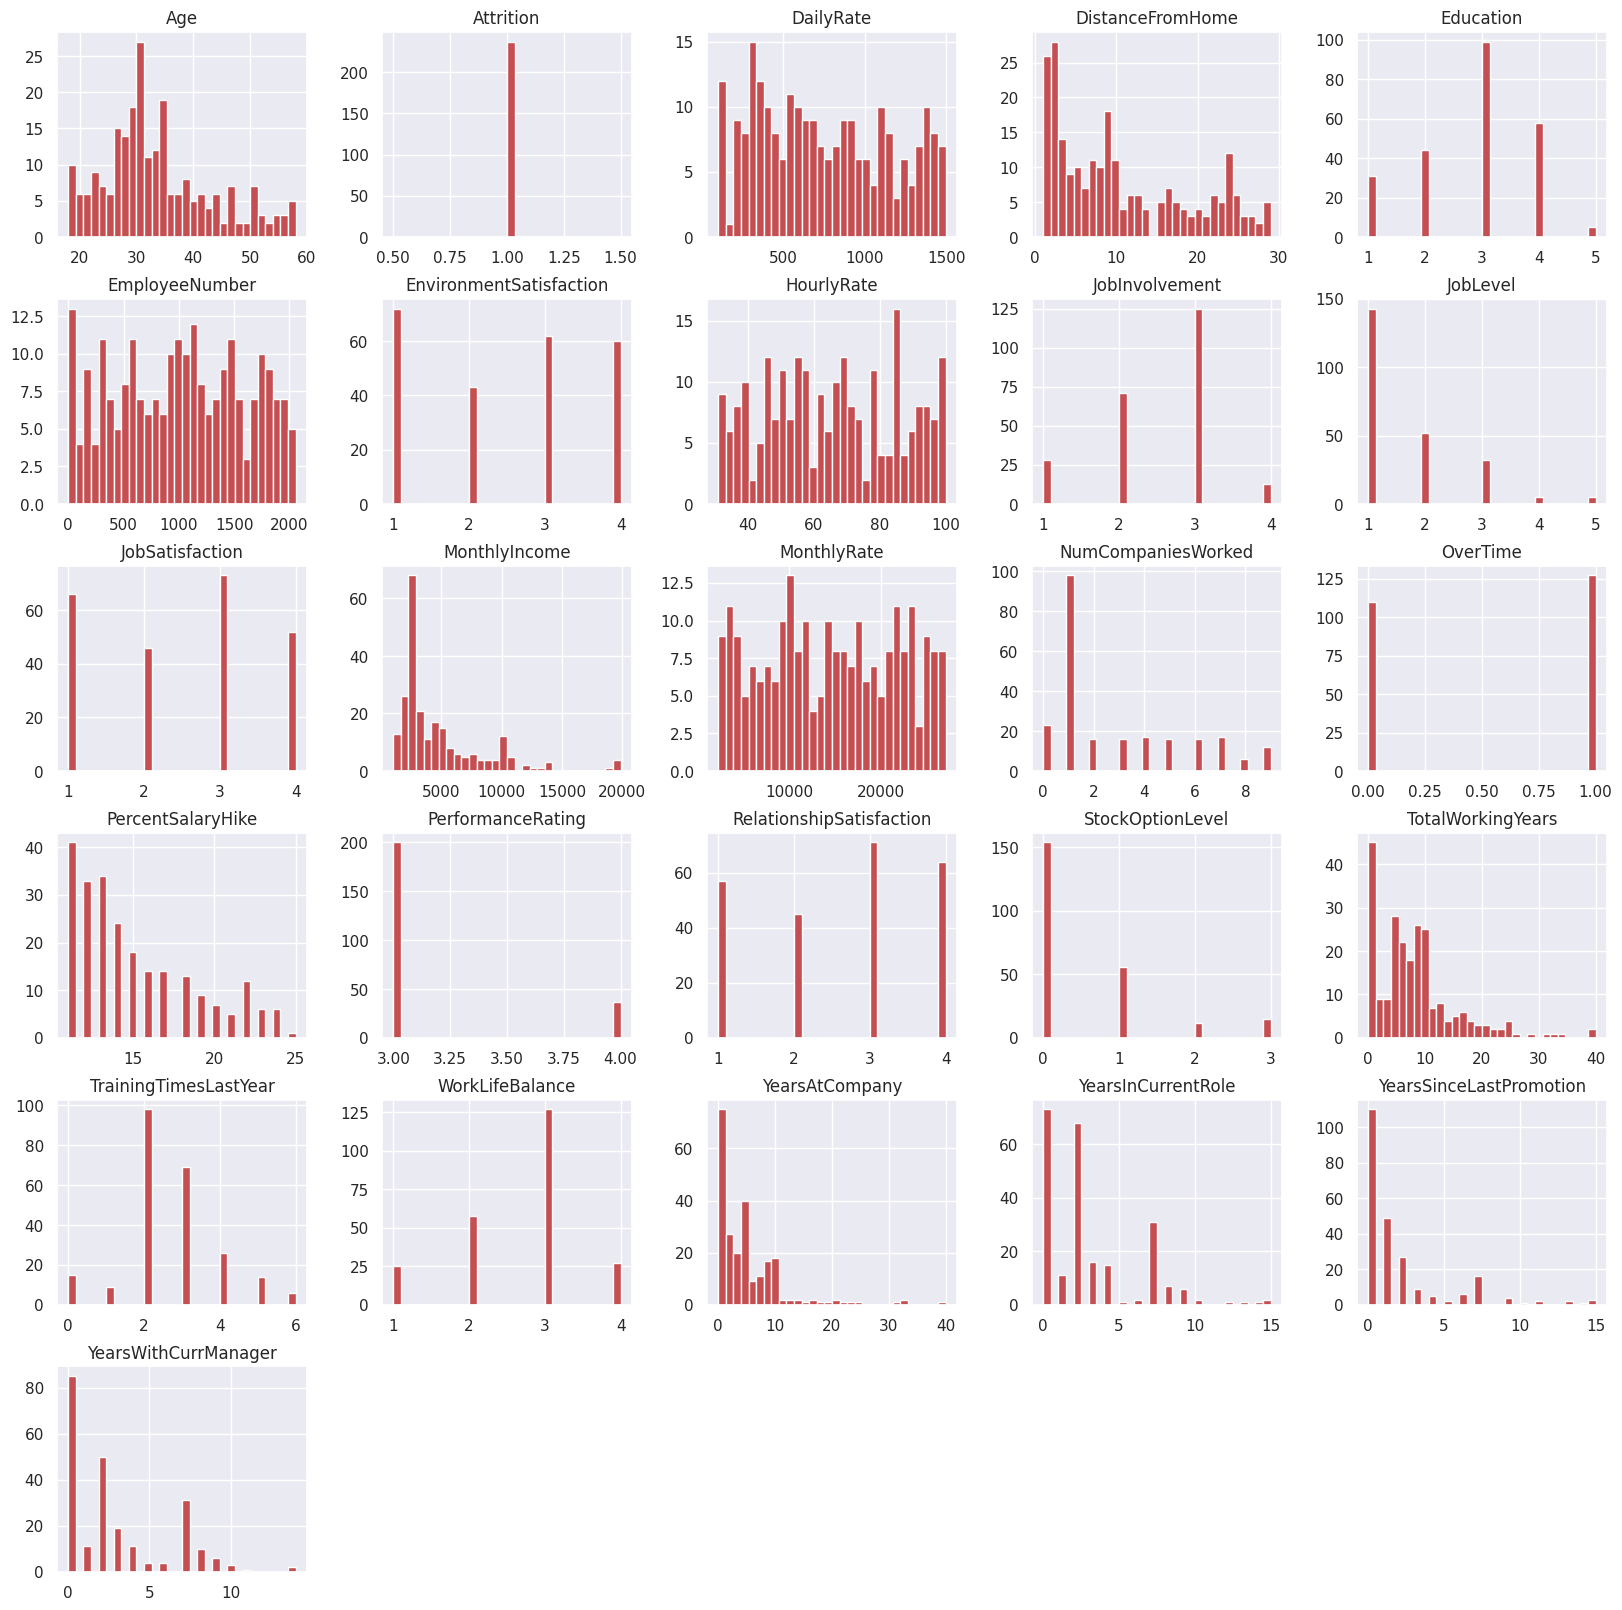

In [ ]:
_ = left_df.hist(bins=30, figsize=(20,20),color='r')

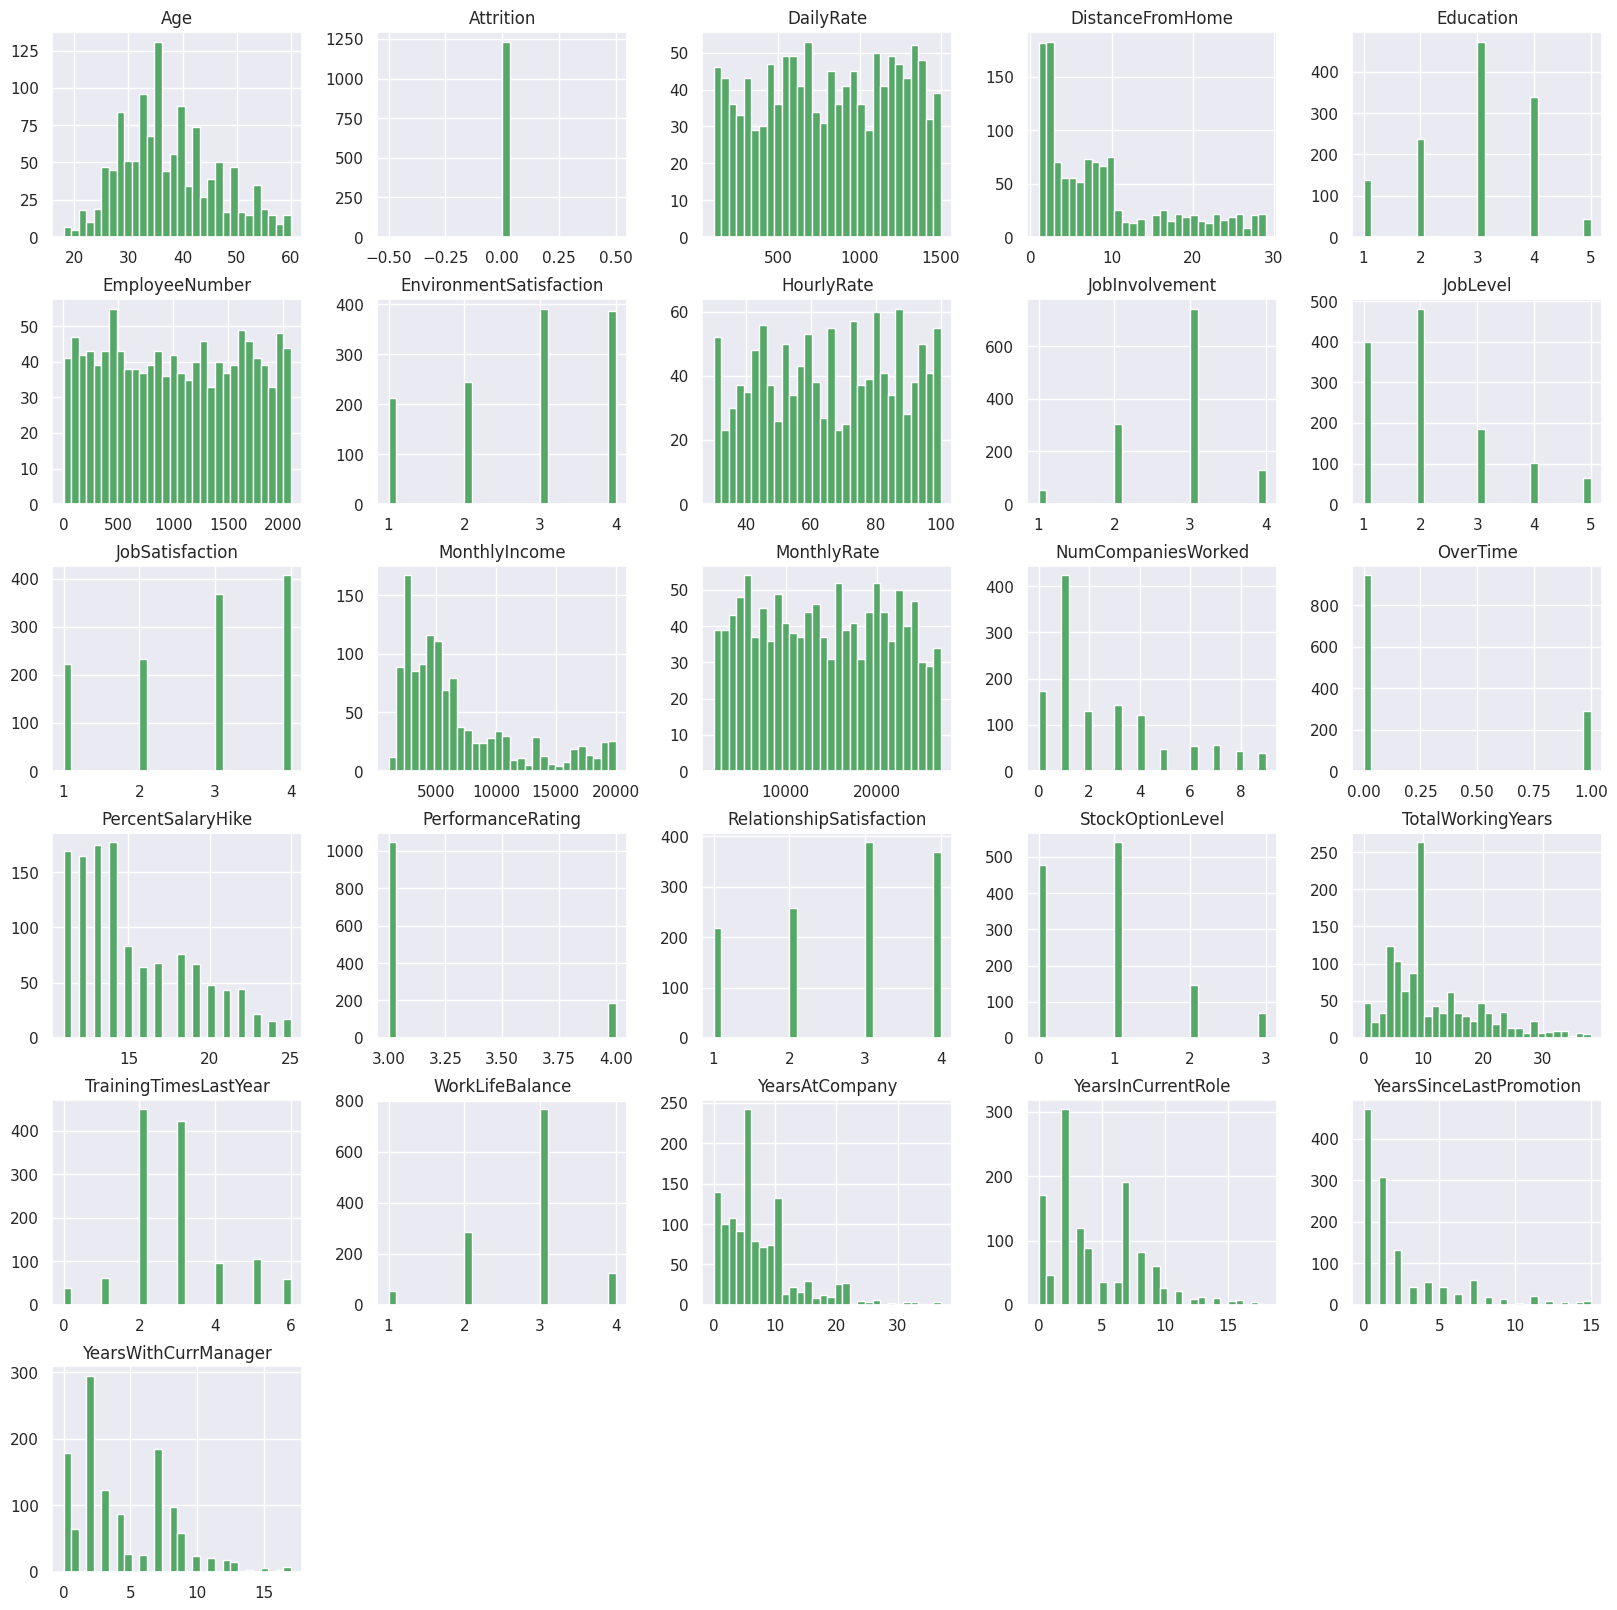

In [ ]:
_=stay_df.hist(bins=30, figsize=(20,20),color='g')

Check correlations between the variables

<ipython-input-741-0db44c27afa0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


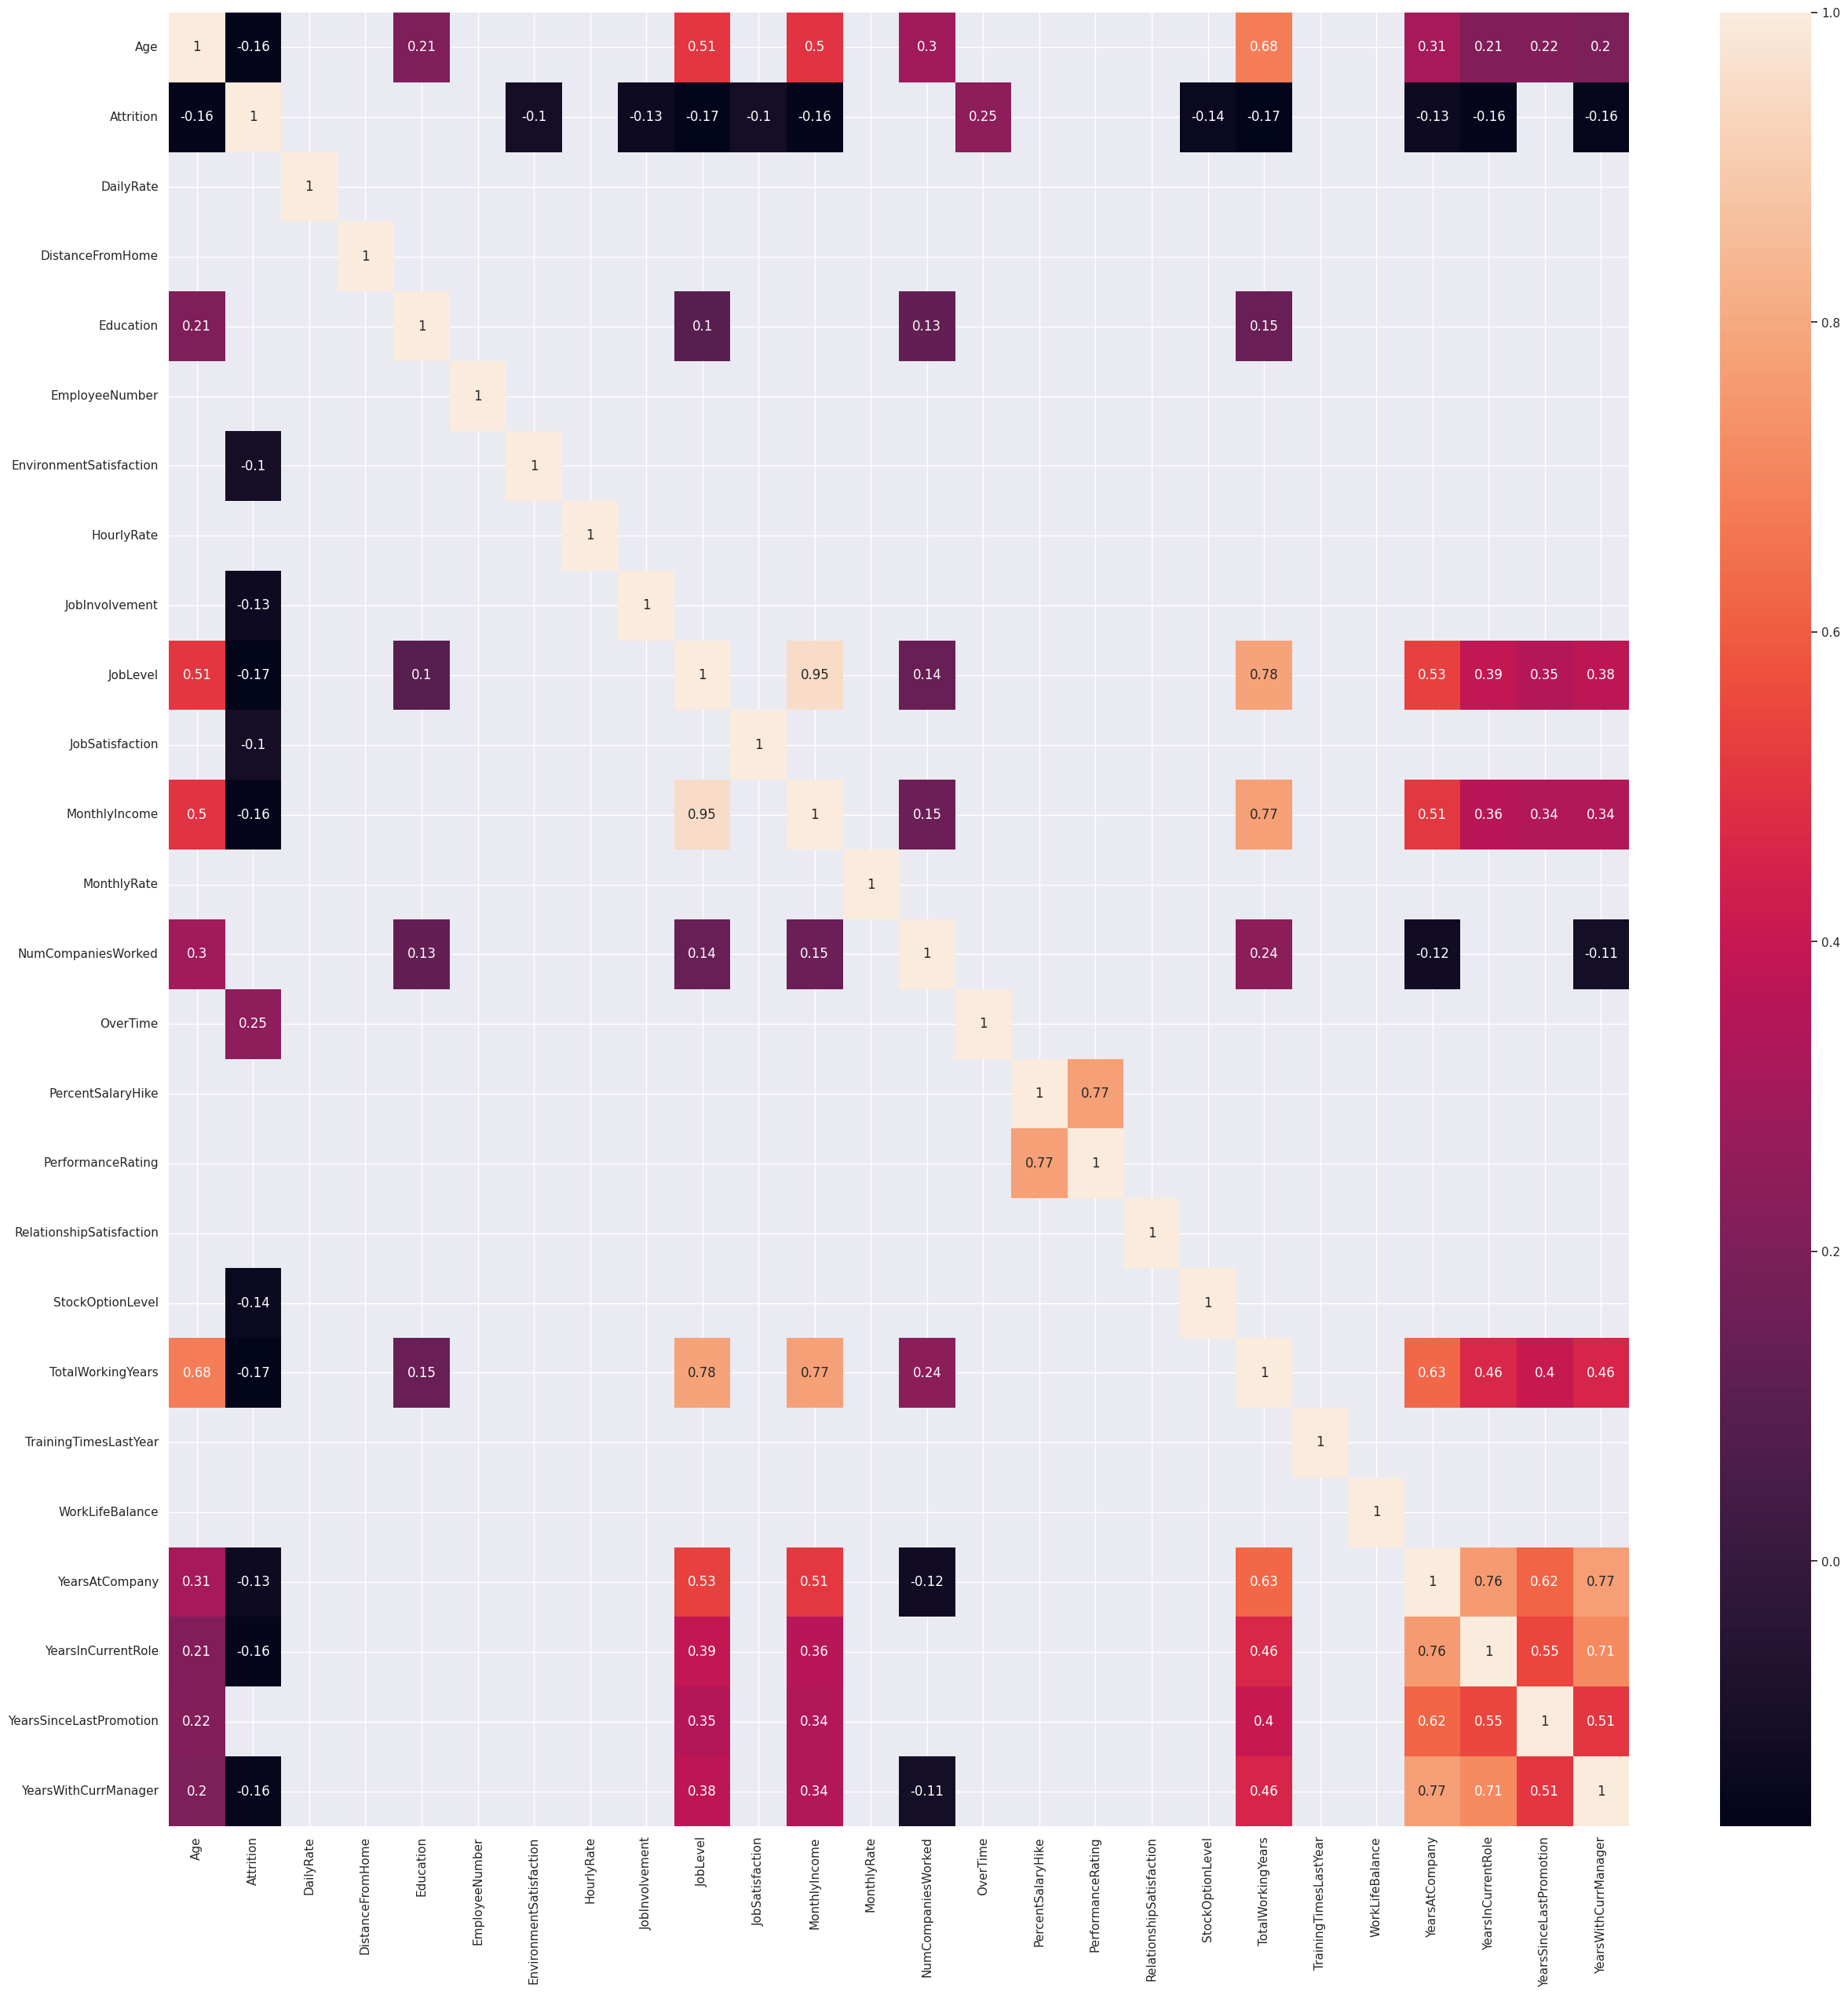

In [ ]:
correlations = df.corr()
correlations = correlations[(correlations > 0.1) | (correlations < -0.1)]
f, ax = plt.subplots(figsize = (30,30))
_ = sns.heatmap(correlations, annot = True)

sf = correlations['Attrition'].dropna().index.tolist() #Siginificant features with |R| > 0.1
sf.remove('Attrition')



There are strong positive correlations sparse throughout the dataset

*   Total Working Years  vs Job level
*   Total Working Years  vs Monthly Income
*   Total Working Years  vs Age

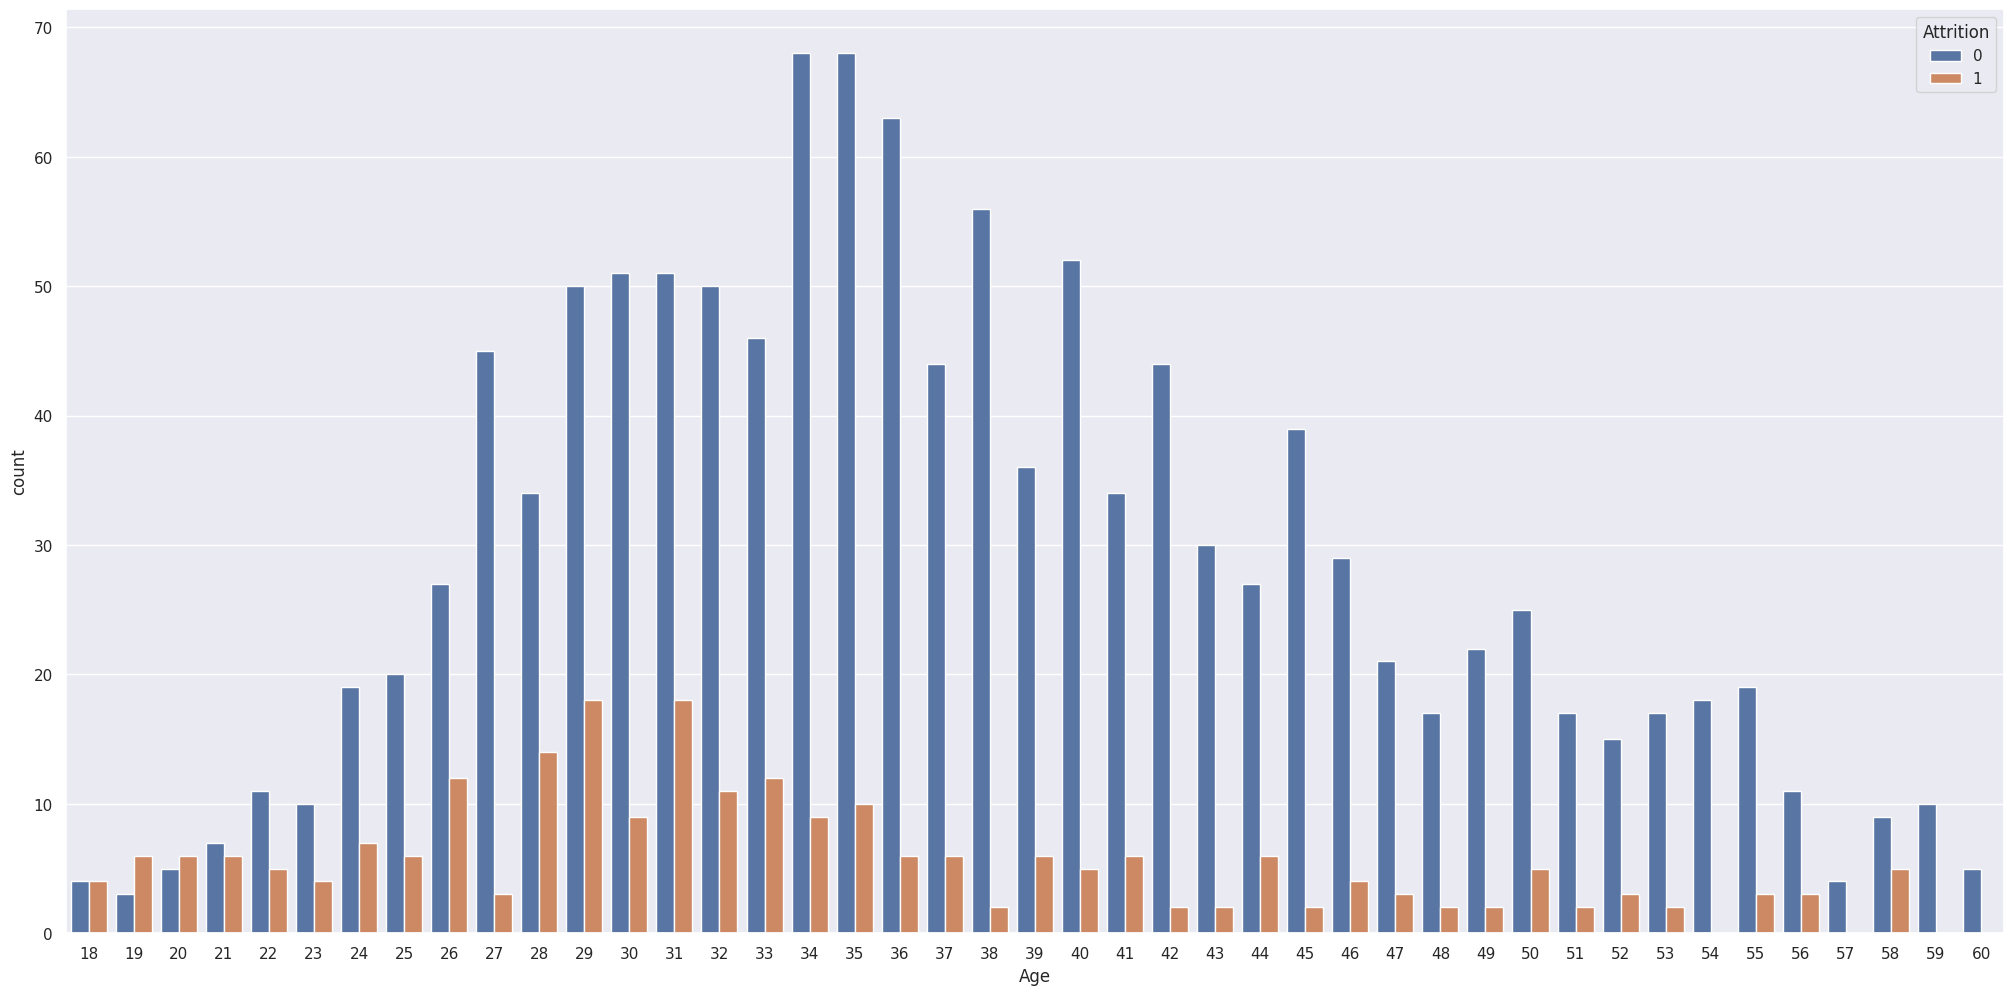

In [ ]:
_ = plt.figure(figsize = [25,12])
_ = sns.countplot(x = 'Age', hue = 'Attrition', data = df)

Employees around 20 years old, are more proclive to leave the company
There is a strong variability of the Attrition vs the Age.

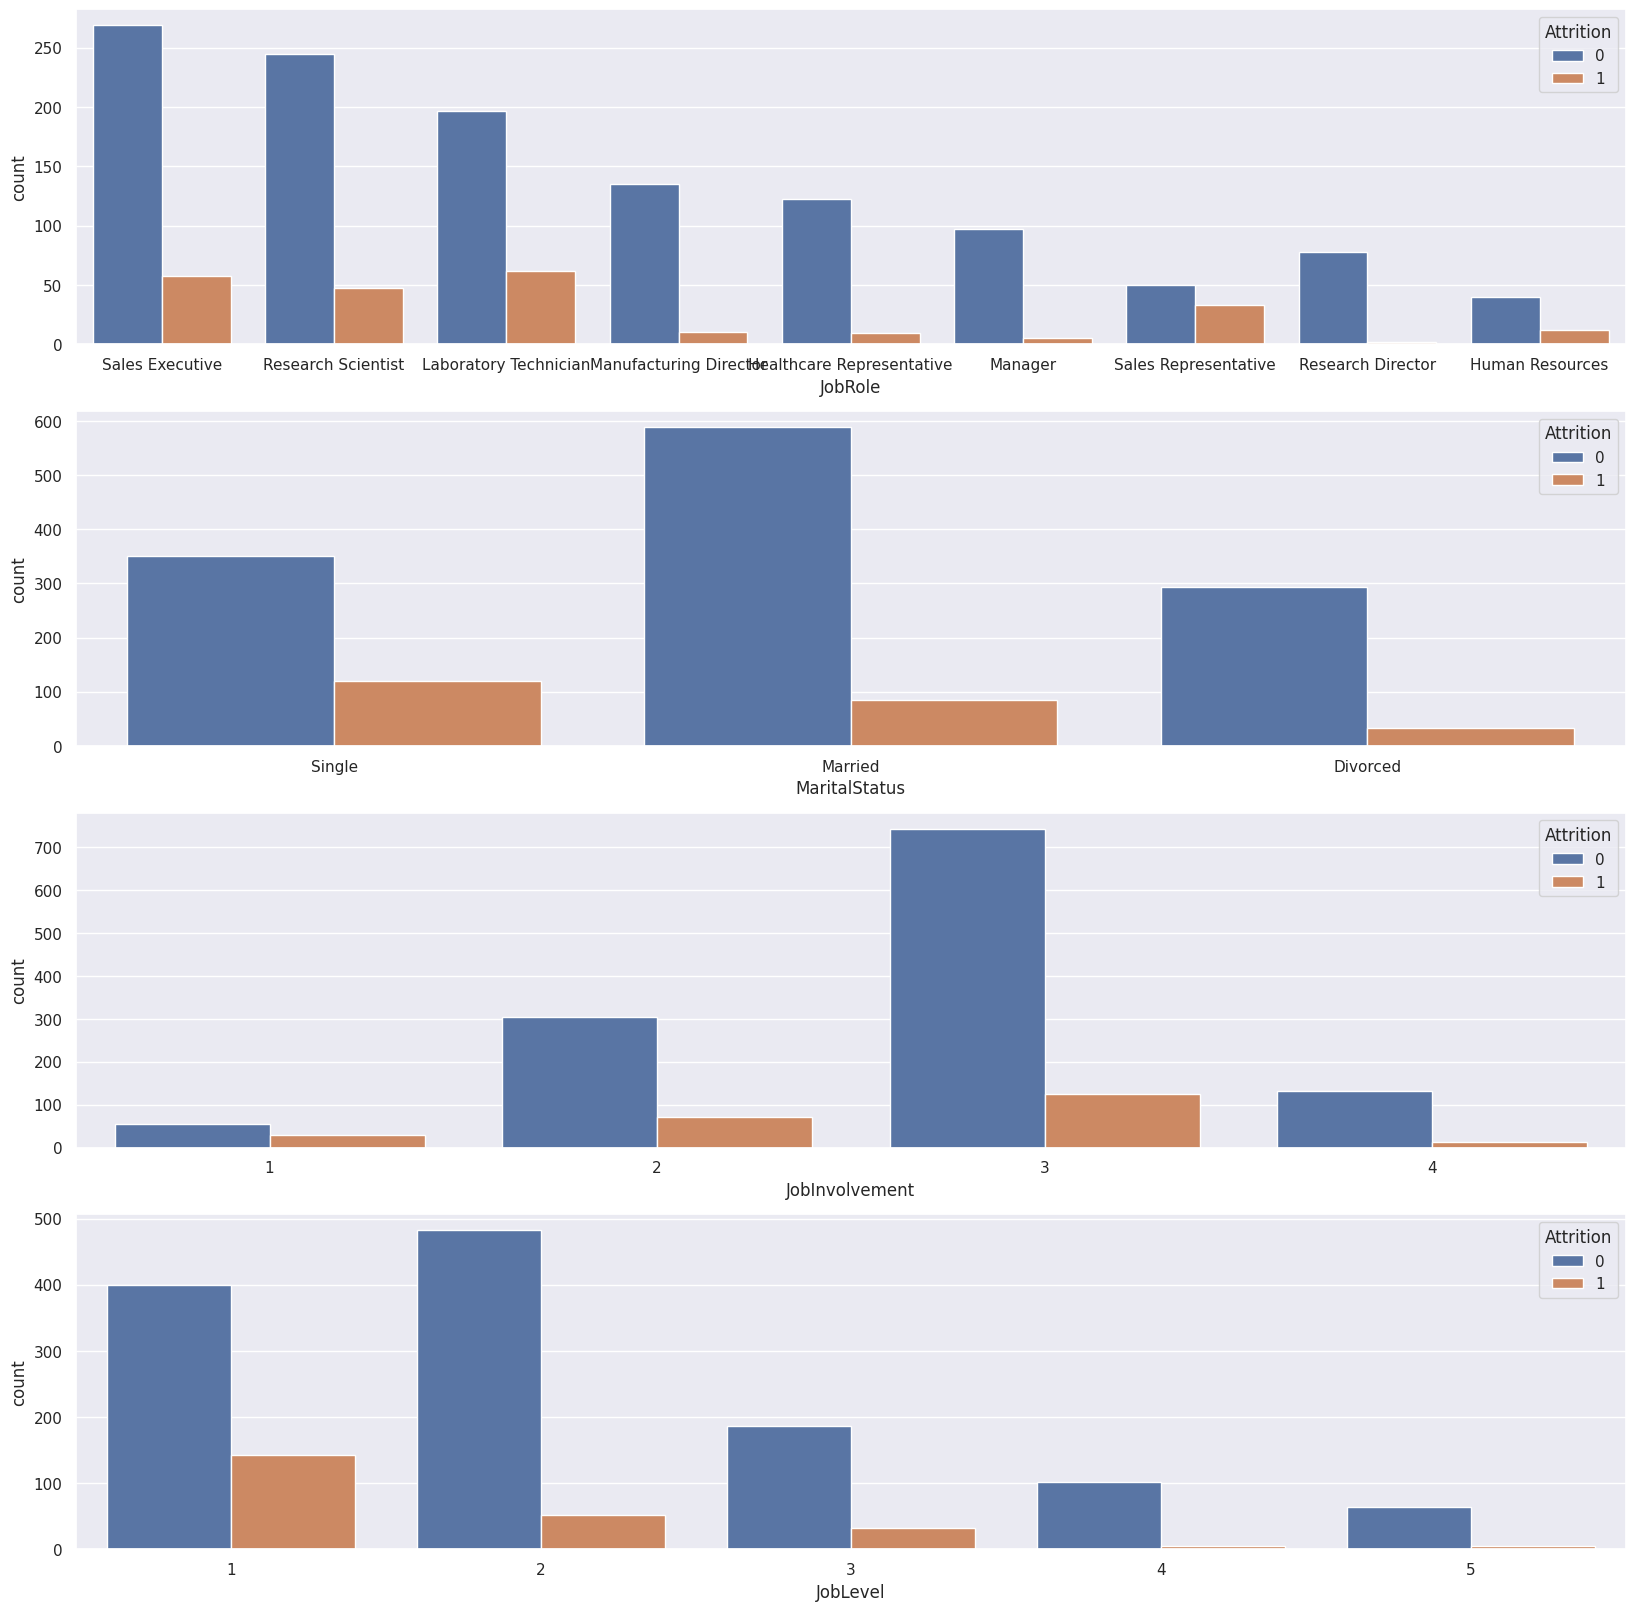

In [ ]:
_ = plt.figure(figsize=[20,20])

_ = plt.subplot(411)
_ = sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)

_ = plt.subplot(412)
_ = sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)

_ = plt.subplot(413)
_ = sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df)

_ = plt.subplot(414)
_ = sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)

* The sales department has the larger ratio of resigns.
* Single employees tend to leave the company more than others.
* The more Job Involvement the less probable to have resigns
* The smaller the Job level, the larger the probability of leaving the company

## KDE (Kernel Density Estimate) graphs

KDE describes the probability density at different values in a continuous variable

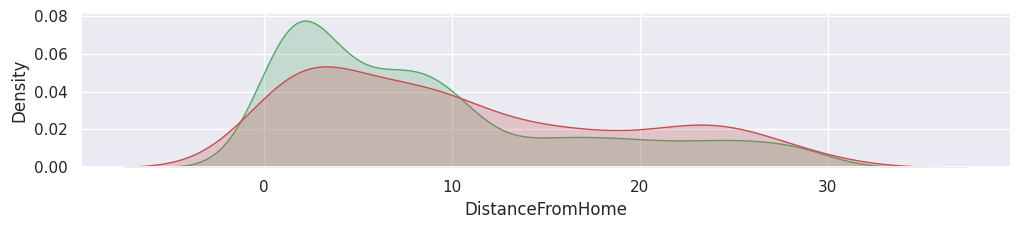

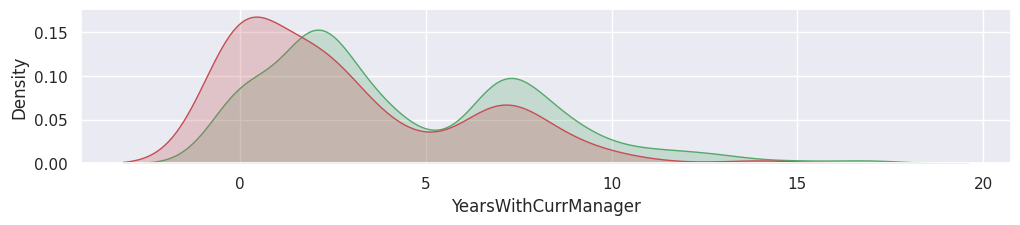

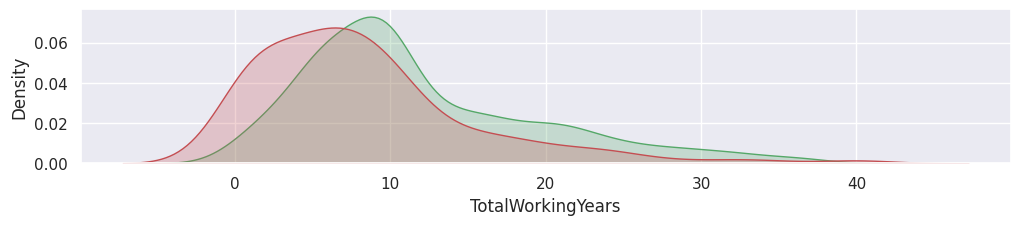

In [ ]:
fig = plt.figure(figsize=(12,2))

_ = sns.kdeplot(stay_df['DistanceFromHome'], label = 'Employees who stayed', fill = True, color = 'g')
_ = sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', fill = True, color = 'r')

fig = plt.figure(figsize=(12,2))

_ = sns.kdeplot(stay_df['YearsWithCurrManager'], label = 'Employees who stayed', fill = True, color = 'g')
_ = sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', fill = True, color = 'r')

fig = plt.figure(figsize=(12,2))

_ = sns.kdeplot(stay_df['TotalWorkingYears'], label = 'Employees who stayed', fill = True, color = 'g')
_ = sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', fill = True, color = 'r')

* The Distance from home is correlated with resignations after 10 miles
* The employees that have been less than 2 years with a manager are proner to leave the company
* The employees that has been less than 5 years in the company are proner to leave

## Boxplot graphs

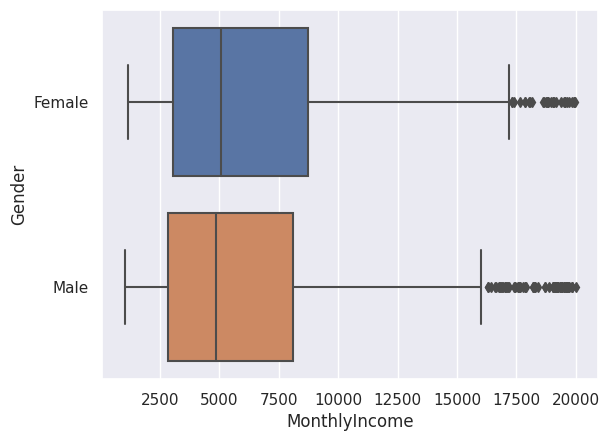

In [ ]:
_ = sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = df )

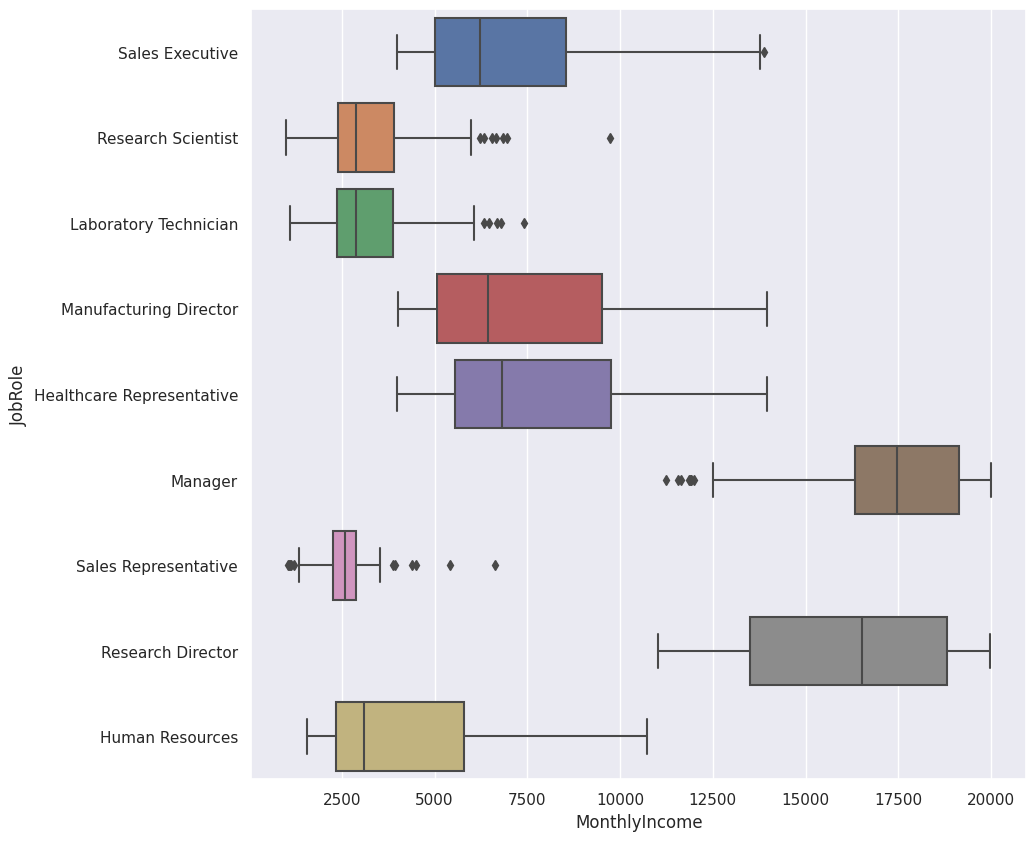

In [ ]:
plt.figure(figsize = (10,10))
_ = sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = df )

# Task 4: Create testing and trainig datasets & Data cleansing

Separate Categorical data from Numerical data

In [ ]:
df_orig = df
print(df_orig.shape)

(1470, 32)


In [ ]:
#Segment the data to balance the dataset

df_atr_0 = df[df['Attrition']==0].sample(n=900, random_state=1)
df_atr_1 = df[df['Attrition']==1]

df = pd.concat([df_atr_0 , df_atr_1],axis = 0)
df = df.sample(frac = 1)
df = df.reset_index()

#Get Numeric and categorical columns
g = df.columns.to_series().groupby(df.dtypes).groups
gkey = list(g.keys())
num_cols = list(g.get(gkey[0]))
cat_cols = list(g.get(gkey[1]))

X_num = df[num_cols]  # Dataframe with all numerical data

X_num = X_num.drop(['EmployeeNumber','Attrition'], axis = 1)

X_cat = df[cat_cols]  # Dataframe with all categorical data to be encoded

print('X_num shape {}'.format(X_num.shape))
print(X_num.columns.to_series())
print('X_cat shape {}'.format(X_cat.shape))

X_num shape (1137, 25)
index                                          index
Age                                              Age
DailyRate                                  DailyRate
DistanceFromHome                    DistanceFromHome
Education                                  Education
EnvironmentSatisfaction      EnvironmentSatisfaction
HourlyRate                                HourlyRate
JobInvolvement                        JobInvolvement
JobLevel                                    JobLevel
JobSatisfaction                      JobSatisfaction
MonthlyIncome                          MonthlyIncome
MonthlyRate                              MonthlyRate
NumCompaniesWorked                NumCompaniesWorked
OverTime                                    OverTime
PercentSalaryHike                  PercentSalaryHike
PerformanceRating                  PerformanceRating
RelationshipSatisfaction    RelationshipSatisfaction
StockOptionLevel                    StockOptionLevel
TotalWorkingYears      

In [ ]:
X_sf = df[sf]  # Dataframe with all significant features
print('X_sf shape {}'.format(X_sf.shape))

X_sf shape (1137, 12)


In [ ]:
one_hot_encoder = OneHotEncoder()
X_cat = one_hot_encoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat = pd.DataFrame(X_cat)
X_cat.columns = X_cat.columns.astype(str)
print(X_cat.shape)

(1137, 26)
(1137, 6)


In [ ]:
#X_all = pd.concat([X_cat,X_num],axis = 1)
X_all = pd.concat([X_cat,X_sf],axis = 1)
print(X_all.shape)

(1137, 38)
(1470, 76)


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

print(X.shape)

(1137, 38)
(1470, 76)


In [ ]:
y = df['Attrition']

# Task 6: Logistic Regression Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

print(X_train.shape)
print(X_test.shape)


(852, 38)
(285, 38)


In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test) #Testing model
print(y_pred.shape)
print(y_test.shape)

(285,)
(285,)


In [ ]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred,y_test) ) )

Accuracy 83.15789473684211 %


<Axes: >

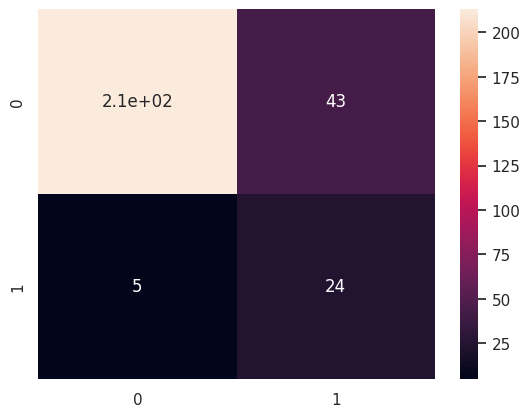

In [ ]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       218
           1       0.83      0.36      0.50        67

    accuracy                           0.83       285
   macro avg       0.83      0.67      0.70       285
weighted avg       0.83      0.83      0.80       285



# Task 8: Random Forest Classifier

Accuracy 91.9298245614035 %


<Axes: >

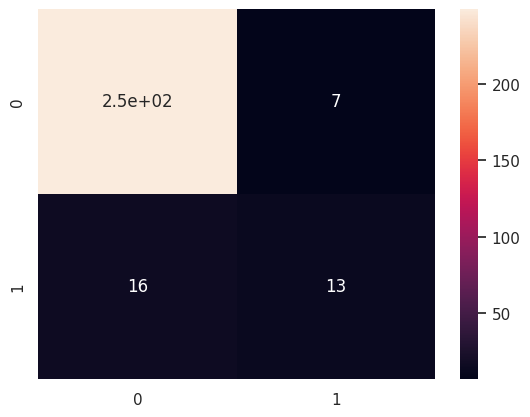

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_test = model.predict(X_test)


print('Accuracy {} %'.format(100 * accuracy_score(y_pred,y_test) ) )

cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       265
           1       0.45      0.65      0.53        20

    accuracy                           0.92       285
   macro avg       0.71      0.79      0.74       285
weighted avg       0.94      0.92      0.93       285



# Task 9: Training and evaluate a deep learning model



In [ ]:
X_all.shape[1]

38

In [ ]:
model  = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (X_all.shape[1],)))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 500)               19500     
                                                                 
 dense_53 (Dense)            (None, 500)               250500    
                                                                 
 dense_54 (Dense)            (None, 500)               250500    
                                                                 
 dense_55 (Dense)            (None, 1)                 501       
                                                                 
Total params: 521,001
Trainable params: 521,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epoch_hist = model.fit(X_train, y_train, epochs = 60, batch_size = 50)

Epoch 1/60
18/18 [==============================] - 1s 11ms/step - loss: 0.5134 - accuracy: 0.7700
Epoch 2/60
18/18 [==============================] - 0s 11ms/step - loss: 0.4159 - accuracy: 0.8204
Epoch 3/60
18/18 [==============================] - 0s 18ms/step - loss: 0.3905 - accuracy: 0.8439
Epoch 4/60
18/18 [==============================] - 0s 17ms/step - loss: 0.3526 - accuracy: 0.8662
Epoch 5/60
18/18 [==============================] - 0s 16ms/step - loss: 0.3290 - accuracy: 0.8697
Epoch 6/60
18/18 [==============================] - 0s 15ms/step - loss: 0.3118 - accuracy: 0.8768
Epoch 7/60
18/18 [==============================] - 0s 16ms/step - loss: 0.2969 - accuracy: 0.8756
Epoch 8/60
18/18 [==============================] - 0s 16ms/step - loss: 0.2653 - accuracy: 0.8885
Epoch 9/60
18/18 [==============================] - 0s 15ms/step - loss: 0.2467 - accuracy: 0.8920
Epoch 10/60
18/18 [==============================] - 0s 16ms/step - loss: 0.2163 - accuracy: 0.9049
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

9/9 [==============================] - 0s 3ms/step


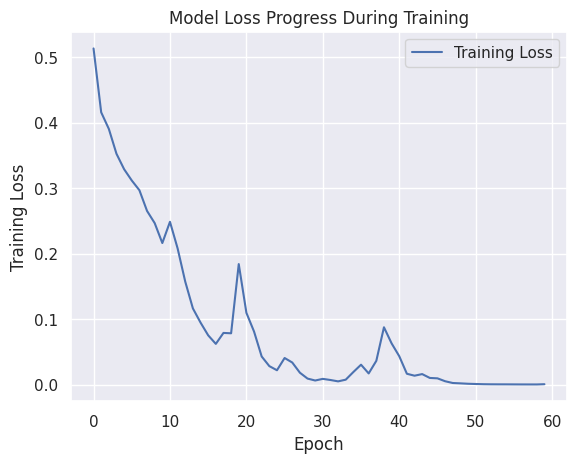

In [ ]:
_ = plt.plot(epoch_hist.history['loss'])
_ = plt.title('Model Loss Progress During Training')
_ = plt.xlabel('Epoch')
_ = plt.ylabel('Training Loss')
_ = plt.legend(['Training Loss'])

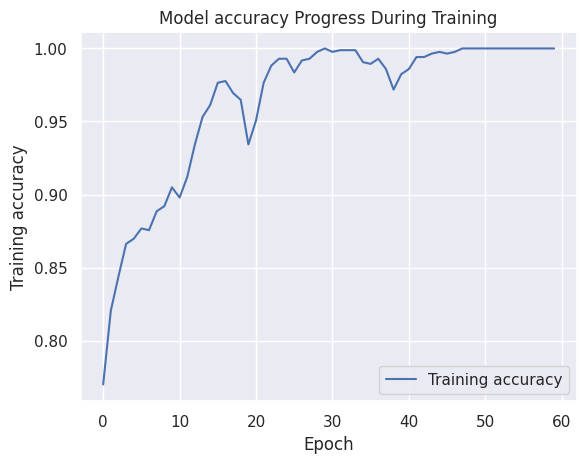

In [ ]:
_ = plt.plot(epoch_hist.history['accuracy'])
_ = plt.title('Model accuracy Progress During Training')
_ = plt.xlabel('Epoch')
_ = plt.ylabel('Training accuracy')
_ = plt.legend(['Training accuracy'])

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

9/9 [==============================] - 0s 3ms/step


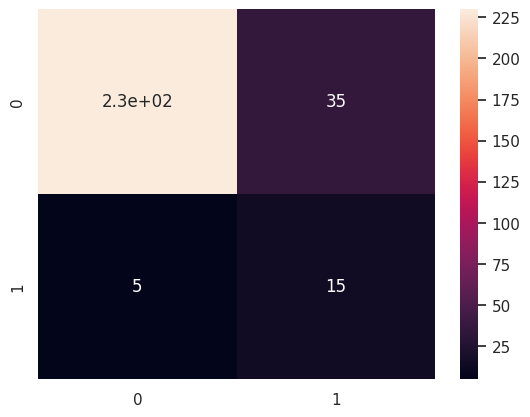

In [ ]:
cm = confusion_matrix(y_test,y_pred)
_ = sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       265
           1       0.30      0.75      0.43        20

    accuracy                           0.86       285
   macro avg       0.64      0.81      0.67       285
weighted avg       0.93      0.86      0.89       285

